In [6]:
import numpy as np
import pandas as pd

import seaborn as sns

from config import *
from src.prob_model_evaluator import ModelEvaluator
from src.models.ngb import NGB
from src.models.gpr import GPr

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(8.7,5.27)})
sns.set(style="whitegrid", font_scale=1.5)
plt.rcParams['lines.markersize'] = 7

# Mordred

## NGBoost

In [2]:
model = NGB()
feature_set = ["mordred"]
neval = ModelEvaluator(data_dir, name, feature_set, model, scaler_x=None, scaler_y=None)

m, a, b = neval.evaluate_hold_out(n_repeats=10)


Masking 0 feature dims for ['mordred']
[iter 0] loss=4.7651 val_loss=5.2488 scale=1.0000 norm=25.0830
[iter 100] loss=4.2952 val_loss=4.9370 scale=2.0000 norm=27.5510
[iter 200] loss=3.7882 val_loss=5.2214 scale=2.0000 norm=11.2453
== Early stopping achieved.
== Best iteration / VAL107 (val_loss=4.9297)
[iter 0] loss=4.8676 val_loss=4.7174 scale=1.0000 norm=29.2918
[iter 100] loss=4.4631 val_loss=4.6482 scale=2.0000 norm=34.3984
== Early stopping achieved.
== Best iteration / VAL98 (val_loss=4.6466)
[iter 0] loss=4.7498 val_loss=5.4511 scale=1.0000 norm=25.0389
[iter 100] loss=4.2675 val_loss=4.8518 scale=2.0000 norm=26.8516
[iter 200] loss=3.7588 val_loss=4.7911 scale=2.0000 norm=10.6207
== Early stopping achieved.
== Best iteration / VAL175 (val_loss=4.7490)
[iter 0] loss=4.7951 val_loss=4.6666 scale=1.0000 norm=26.7381
[iter 100] loss=4.3679 val_loss=4.5212 scale=2.0000 norm=30.2726
[iter 200] loss=3.8647 val_loss=4.3711 scale=2.0000 norm=12.1039
[iter 300] loss=3.3693 val_loss=4.72

In [3]:
m

,R^2,MAE,MMC,AMC
mean,0.432134,17.140376,0.232367,0.123103
50%,0.473016,18.039453,0.188406,0.084474
std,0.247722,3.511143,0.127884,0.092590


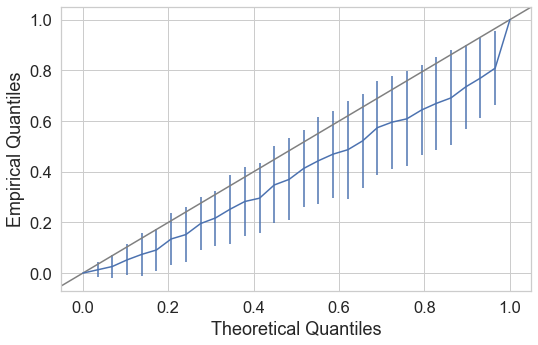

In [7]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.75,0.75]) # axis starts at 0.1, 0.1
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Empirical Quantiles")
ax.errorbar(x = a.loc["mean"].squeeze(), 
             y = b.loc["mean"].squeeze(), yerr= b.loc["std"].squeeze())
ax.axline([0, 0], [1,1], c='gray')

## Gaussian Process Regression


In [9]:
model = GPr(kernel='rbf')
feature_set = ["mordred"]
neval = ModelEvaluator(data_dir, name, feature_set, model, scaler_x="standard", scaler_y="standard")

m, a, b = neval.evaluate_hold_out(n_repeats=10)

Masking 0 feature dims for ['mordred']


In [10]:
m

,R^2,MAE,MMC,AMC
mean,-0.032422,0.917391,0.424155,0.240821
50%,-0.020077,0.938376,0.427536,0.236514
std,0.039447,0.080921,0.064565,0.038705


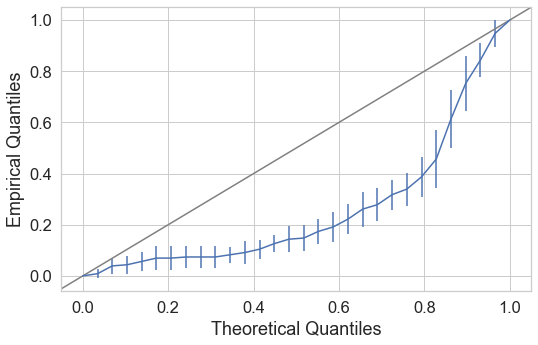

In [11]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.75,0.75]) # axis starts at 0.1, 0.1
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Empirical Quantiles")
ax.errorbar(x = a.loc["mean"].squeeze(), 
             y = b.loc["mean"].squeeze(), yerr= b.loc["std"].squeeze())
ax.axline([0, 0], [1,1], c='gray')

# Morgan

## NGB

In [12]:
model = NGB()
feature_set = ["morgan"]
neval = ModelEvaluator(data_dir, name, feature_set, model)

m, a, b = neval.evaluate_hold_out(n_repeats=10)


Masking 0 feature dims for ['morgan']
[iter 0] loss=4.7651 val_loss=5.2526 scale=1.0000 norm=25.0830
[iter 100] loss=4.4396 val_loss=5.0322 scale=1.0000 norm=17.8503
[iter 200] loss=4.1806 val_loss=5.0565 scale=1.0000 norm=12.3923
== Early stopping achieved.
== Best iteration / VAL136 (val_loss=5.0181)
[iter 0] loss=4.8676 val_loss=4.7189 scale=1.0000 norm=29.2918
[iter 100] loss=4.5197 val_loss=4.7623 scale=1.0000 norm=18.8034
== Early stopping achieved.
== Best iteration / VAL2 (val_loss=4.7171)
[iter 0] loss=4.7498 val_loss=5.4531 scale=1.0000 norm=25.0389
[iter 100] loss=4.3775 val_loss=5.0241 scale=2.0000 norm=32.5419
[iter 200] loss=4.0070 val_loss=4.9124 scale=2.0000 norm=19.1444
== Early stopping achieved.
== Best iteration / VAL193 (val_loss=4.9056)
[iter 0] loss=4.7951 val_loss=4.6651 scale=1.0000 norm=26.7381
[iter 100] loss=4.4832 val_loss=4.4822 scale=1.0000 norm=18.5630
[iter 200] loss=4.1803 val_loss=4.2895 scale=2.0000 norm=23.7449
[iter 300] loss=3.7941 val_loss=4.2134

In [13]:
m

,R^2,MAE,MMC,AMC
mean,0.388214,18.089443,0.243478,0.119583
50%,0.400776,18.412793,0.212560,0.106079
std,0.159300,2.820246,0.082808,0.058648


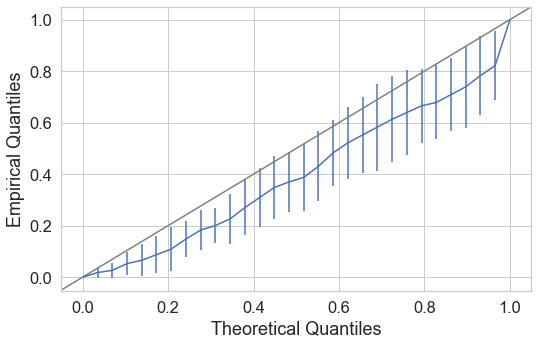

In [14]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.75,0.75]) # axis starts at 0.1, 0.1
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Empirical Quantiles")
ax.errorbar(x = a.loc["mean"].squeeze(), 
             y = b.loc["mean"].squeeze(), yerr= b.loc["std"].squeeze())
ax.axline([0, 0], [1,1], c='gray')

## Gaussian Process Regression

In [15]:
model = GPr(kernel='Tanimoto')
feature_set = ["morgan"]
neval = ModelEvaluator(data_dir, name, feature_set, model)

m, a, b = neval.evaluate_hold_out(n_repeats=10)

Masking 0 feature dims for ['morgan']


In [16]:
m

,R^2,MAE,MMC,AMC
mean,0.500157,16.624872,0.149275,0.074365
50%,0.556860,16.057565,0.140097,0.059894
std,0.158386,2.635544,0.064148,0.043625


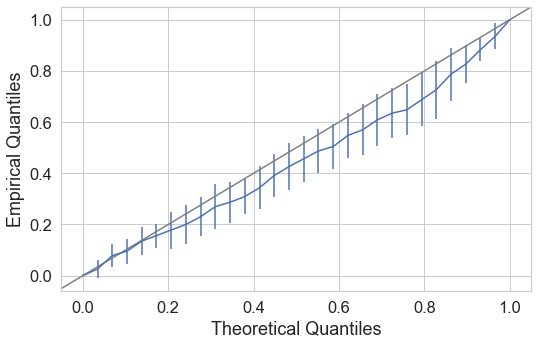

In [17]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.75,0.75]) # axis starts at 0.1, 0.1
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Empirical Quantiles")
ax.errorbar(x = a.loc["mean"].squeeze(), 
             y = b.loc["mean"].squeeze(), yerr= b.loc["std"].squeeze())
ax.axline([0, 0], [1,1], c='gray')

# Morgan + Mordred

## NGBoost

In [18]:
model = NGB()
feature_set = ["mordred", "morgan"]
neval = ModelEvaluator(data_dir, name, feature_set, model)

m, a, b = neval.evaluate_hold_out(n_repeats=10)


Masking 0 feature dims for ['mordred', 'morgan']
[iter 0] loss=4.7651 val_loss=5.2497 scale=1.0000 norm=25.0830
[iter 100] loss=4.2952 val_loss=4.9409 scale=2.0000 norm=27.5510
[iter 200] loss=3.7882 val_loss=5.2493 scale=2.0000 norm=11.2453
== Early stopping achieved.
== Best iteration / VAL104 (val_loss=4.9373)
[iter 0] loss=4.8676 val_loss=4.7174 scale=1.0000 norm=29.2918
[iter 100] loss=4.4631 val_loss=4.6438 scale=2.0000 norm=34.3984
[iter 200] loss=3.9403 val_loss=4.9677 scale=2.0000 norm=13.2399
== Early stopping achieved.
== Best iteration / VAL106 (val_loss=4.6413)
[iter 0] loss=4.7498 val_loss=5.4511 scale=1.0000 norm=25.0389
[iter 100] loss=4.2675 val_loss=4.8646 scale=2.0000 norm=26.8516
[iter 200] loss=3.7583 val_loss=4.8016 scale=2.0000 norm=10.5939
== Early stopping achieved.
== Best iteration / VAL173 (val_loss=4.7573)
[iter 0] loss=4.7951 val_loss=4.6666 scale=1.0000 norm=26.7381
[iter 100] loss=4.3679 val_loss=4.5288 scale=2.0000 norm=30.2726
[iter 200] loss=3.8647 va

In [19]:
m

,R^2,MAE,MMC,AMC
mean,0.434161,17.110739,0.232367,0.124781
50%,0.481162,17.854361,0.188406,0.091922
std,0.250320,3.571922,0.122223,0.085236


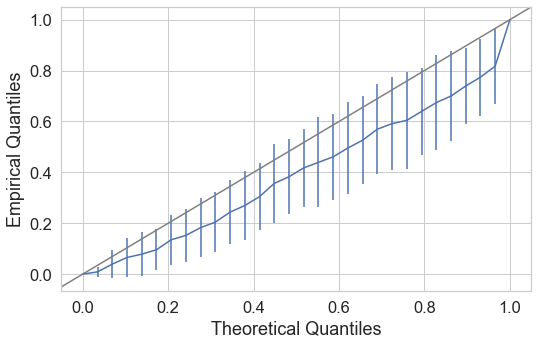

In [20]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.75,0.75]) # axis starts at 0.1, 0.1
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Empirical Quantiles")
ax.errorbar(x = a.loc["mean"].squeeze(), 
             y = b.loc["mean"].squeeze(), yerr= b.loc["std"].squeeze())
ax.axline([0, 0], [1,1], c='gray')